In [3]:
!pip3 install --force-reinstall openpyxl



     ------------------------------------- 250.0/250.0 kB 15.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import glob
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebookº
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Extracción y Transformación de Datos.

## 1. Introducción.

Se le entregarán 6 archivos de datos (llamados La Liga XXXX), que contienen los resultados de la Primera División Española de Fútbol desde la temporada 16/17 a la 21/22. Estos archivos han sido unidos, limpiados y se han creado nuevas columnas de información a partir de los datos originales (todo esto se mostrará a continuación en este código).

## 2. Datos del Dataframe "partidos6t".

En este ejercicio, buscamos construir un dataset limpio para analizar el mercado inmobiliario y gastronómico en la región Metropolitana. En particular, se estudiarán las relaciones entre precios de propiedades, distribución de restaurants y población en las zonas censales de cuatro comunas (Santiago, Las Condes, Providencia y Ñuñoa), para responder preguntas como por ejemplo:

- Wk: fecha, desde la 1 a la 38, del calendario del torneo	
- Date: día, mes y año en que se jugó el partido 	
- Local: equipo que jugó de local el partido	
- Score: resultado, como string, del partido
- Visitante: equipo que jugí de visitante el partido	
- Attendance: asistencia de público al estado para el partido	
- Torneo: indica si el partido es de primera división
- Goles Local: valor numérico de los goles que hizo el equipo local en el partido	
- Goles Visitante: valor numérico de los goles que hizo el equipo visitante en el partido	
- Total goles partido: cantidad total de goles convertidos en el partido	
- Año: año del partido	
- Mes: mes del partido	
- Temporada: indica si partido es de la temporada 16/17; 17/18,...,21/22
- Resultado: indica si el partido lo ganó el local, la visita o fue empate	
- Ganador: indica el nombre del equipo que ganó el partido, y en caso de empate, indica empate

La entrega del proceso y código completo corresponde al Taller 3. 

## Carga de información

In [5]:
laliga2122 = pd.read_excel('LaLiga21 22.xlsx', )
laliga2021 = pd.read_excel('LaLiga20 21.xlsx', )
laliga1920 = pd.read_excel('LaLiga19 20.xlsx', )
laliga1819 = pd.read_excel('LaLiga18 19.xlsx', )
laliga1718 = pd.read_excel('LaLiga17 18.xlsx', )
laliga1617 = pd.read_excel('LaLiga16 17.xlsx', )

## Creando dataframes

In [6]:
laliga = laliga2122.dropna(how='all').append(laliga2021.dropna(how='all')
).append(laliga1920.dropna(how='all')).append(laliga1819.dropna(how='all')
).append(laliga1718.dropna(how='all')).append(laliga1617.dropna(how='all')).loc[:,
['Wk','Date','Local','Score','Visitante', 'Attendance']]


laliga['Attendance']= laliga['Attendance']*1000
laliga['Torneo'] = 'Primera división'

AttributeError: 'DataFrame' object has no attribute 'append'

In [8]:
import pandas as pd

# Combine and append the DataFrames
laliga = pd.concat([
    laliga2122.dropna(how='all'),
    laliga2021.dropna(how='all'),
    laliga1920.dropna(how='all'),
    laliga1819.dropna(how='all'),
    laliga1718.dropna(how='all'),
    laliga1617.dropna(how='all')
])

# Select specific columns
laliga = laliga.loc[:, ['Wk', 'Date', 'Local', 'Score', 'Visitante', 'Attendance']]

# Multiply 'Attendance' column by 1000
laliga['Attendance'] = laliga['Attendance'] * 1000

# Add a new column 'Torneo'
laliga['Torneo'] = 'Primera división'


In [9]:
partidos6t = pd.concat([laliga],axis = 0)
partidos6t

,Wk,Date,Local,Score,Visitante,Attendance,Torneo
0,1.0,2021-08-13,Valencia,1–0,Getafe,9868.0,Primera división
1,1.0,2021-08-14,Cádiz,1–1,Levante,6941.0,Primera división
2,1.0,2021-08-14,Mallorca,1–1,Betis,6279.0,Primera división
3,1.0,2021-08-14,Osasuna,0–0,Espanyol,6715.0,Primera división
4,1.0,2021-08-14,Alavés,1–4,Real Madrid,3968.0,Primera división
...,...,...,...,...,...,...,...
415,38.0,2017-05-21,Valencia,1–3,Villarreal,33587.0,Primera división
416,38.0,2017-05-21,Atlético Madrid,3–1,Athletic Club,52314.0,Primera división
417,38.0,2017-05-21,Celta Vigo,2–2,Real Sociedad,14188.0,Primera división
418,38.0,2017-05-21,Barcelona,4–2,Eibar,74932.0,Primera división


## Creando nuevas columnas

In [10]:
def golesvisita(marcador):
    goles = marcador.split('–')
    return int(goles[1])

def goleslocal(marcador):
    goles = marcador.split('–')
    return int(goles[0])

partidos6t['Goles Local'] = partidos6t['Score'].apply(goleslocal)
partidos6t['Goles Visitante'] = partidos6t['Score'].apply(golesvisita)
partidos6t['Total goles partido']= partidos6t['Goles Local']+partidos6t['Goles Visitante']

In [11]:
def torneo(año,mes):
    if ((año==2016) & (mes<=12)|(año==2017) & (mes<8)):
        return '16/17'
    elif ((año==2017) & (mes<=12)|(año==2018) & (mes<8)):
        return '17/18'
    elif ((año==2018) & (mes<=12)|(año==2019) & (mes<8)):
        return '18/19'
    elif ((año==2019) & (mes<=12)|(año==2020) & (mes<9)):
        return '19/20'
    elif ((año==2020) & (mes<=12)|(año==2021) & (mes<8)):
        return '20/21'
    elif ((año==2021) & (mes<=12)|(año==2022) & (mes<8)):
        return '21/22'

    
partidos6t['Año'] = partidos6t['Date'].dt.year
partidos6t['Mes'] = partidos6t['Date'].dt.month
partidos6t['Temporada'] = partidos6t.apply(lambda x: torneo(x['Año'],x['Mes']),axis = 1)

In [12]:
def resultado(string):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return 'Local'
    if int(goles[0])<int(goles[1]):
        return 'Visitante'
    else: 
        return 'Empate'
    
def resultado_equipo(string, local, visita):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return local
    if int(goles[0])<int(goles[1]):
        return visita
    else: 
        return 'Empate'
    
partidos6t['Resultado'] = partidos6t['Score'].apply(resultado)
partidos6t['Ganador'] = partidos6t.apply(lambda x: resultado_equipo(x['Score'],x['Local'],x['Visitante']),axis=1)

partidos6t

,Wk,Date,Local,Score,Visitante,Attendance,Torneo,Goles Local,Goles Visitante,Total goles partido,Año,Mes,Temporada,Resultado,Ganador
0,1.0,2021-08-13,Valencia,1–0,Getafe,9868.0,Primera división,1,0,1,2021,8,21/22,Local,Valencia
1,1.0,2021-08-14,Cádiz,1–1,Levante,6941.0,Primera división,1,1,2,2021,8,21/22,Empate,Empate
2,1.0,2021-08-14,Mallorca,1–1,Betis,6279.0,Primera división,1,1,2,2021,8,21/22,Empate,Empate
3,1.0,2021-08-14,Osasuna,0–0,Espanyol,6715.0,Primera división,0,0,0,2021,8,21/22,Empate,Empate
4,1.0,2021-08-14,Alavés,1–4,Real Madrid,3968.0,Primera división,1,4,5,2021,8,21/22,Visitante,Real Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,38.0,2017-05-21,Valencia,1–3,Villarreal,33587.0,Primera división,1,3,4,2017,5,16/17,Visitante,Villarreal
416,38.0,2017-05-21,Atlético Madrid,3–1,Athletic Club,52314.0,Primera división,3,1,4,2017,5,16/17,Local,Atlético Madrid
417,38.0,2017-05-21,Celta Vigo,2–2,Real Sociedad,14188.0,Primera división,2,2,4,2017,5,16/17,Empate,Empate
418,38.0,2017-05-21,Barcelona,4–2,Eibar,74932.0,Primera división,4,2,6,2017,5,16/17,Local,Barcelona


## Tabla de posiciones hasta la fecha 33 (inclusive)

In [13]:
ej2122 = partidos6t[(partidos6t['Temporada']=='21/22')&(partidos6t['Torneo']=='Primera división')]
equip2122 = ej2122['Local'].unique().tolist()

In [14]:
def tabla_posicion(data,fecha,equipos):
    tabla = {}
    for equipo in equipos:
        data_usar = data[(data['Wk']<=fecha)&((data['Local']==equipo)|(data['Visitante']==equipo))]
        puntos = 0
        for i in range(len(data_usar)):
            ganador = str(data_usar.iloc[i]['Ganador'])
            if ganador == equipo:
                puntos += 3
            if ganador == 'Empate':
                puntos +=1
        tabla[equipo] = puntos
    df = pd.DataFrame([[key, tabla[key]] for key in tabla.keys()], columns=['Equipo', 'Puntos'])
    df = df.sort_values(by='Puntos',ascending = False).reset_index()
    return df[['Equipo','Puntos']]

In [15]:
tabla_33 = tabla_posicion(ej2122,33,equip2122)
tabla_33

,Equipo,Puntos
0,Real Madrid,78
1,Barcelona,63
2,Sevilla,63
3,Atlético Madrid,61
4,Betis,57
5,Real Sociedad,55
6,Villarreal,52
7,Athletic Club,48
8,Osasuna,44
9,Valencia,42


## Gráfico con la evolución en la posición de un equipo cualquiera, desde la fecha 1 a la fecha n (inclusive)

Torneo y equipos a utilizar:

In [16]:
ej2122 = partidos6t[(partidos6t['Temporada']=='21/22')&(partidos6t['Torneo']=='Primera división')]
equip2122 = ej2122['Local'].unique().tolist()

In [17]:
def tabla_posicion2(data,fecha,equipos,eq):
    tabla = {}
    for equipo in equipos:
        data_usar = data[(data['Wk']<=fecha)&((data['Local']==equipo)|(data['Visitante']==equipo))]
        puntos = 0
        for i in range(len(data_usar)):
            ganador = str(data_usar.iloc[i]['Ganador'])
            if ganador == equipo:
                puntos += 3
            if ganador == 'Empate':
                puntos +=1
        tabla[equipo] = puntos
    df = pd.DataFrame([[key, tabla[key]] for key in tabla.keys()], columns=['Equipo', 'Puntos'])
    df = df.sort_values(by='Puntos',ascending = False).reset_index()
    df = df[['Equipo','Puntos']]
    pos = df[df['Equipo']==eq].index.values[0]
    return pos+1

In [47]:
fechas = sorted(ej2122['Wk'].unique().tolist())


Fecha hasta que desea estudiar

In [19]:
fecha = int(input('Hasta que fecha le interesa estudiar la evolución de la posición: '))

Hasta que fecha le interesa estudiar la evolución de la posición:  2021


Equipo a estudiar

In [21]:
equipo = str(input('Que equipo desea estudiar? '))

Que equipo desea estudiar?  Betis


Creamos la evolución de posiciones

In [22]:
posiciones = []
for fec in fechas:
    pos = tabla_posicion2(ej2122,fec,equip2122,equipo)
    posiciones.append(pos)
    if fec == fecha:
        break

In [23]:
posiciones

[15,
 15,
 17,
 11,
 13,
 10,
 7,
 11,
 8,
 5,
 4,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

## Pregunta 1
Construya un gráfico (adecuado, interesante e intuitivo) para mostrar la evolución de la posición de dos equipos cualquiera durante el torneo. 

In [30]:
#ej2122 = partidos6t[(partidos6t['Temporada']=='21/22')&(partidos6t['Torneo']=='Primera división')]
#equip2122 = ej2122['Local'].unique().tolist()
#fechas = sorted(ej2122['Wk'].unique().tolist())
equipo = "Barcelona"

posiciones_barcelona = []
for fec in fechas:
    pos = tabla_posicion2(ej2122,fec,equip2122,equipo)
    posiciones_barcelona.append(pos)
    if fec == fecha:
        break
        


In [31]:
equipo = "Valencia"

posiciones_valencia = []
for fec in fechas:
    pos = tabla_posicion2(ej2122,fec,equip2122,equipo)
    posiciones_valencia.append(pos)
    if fec == fecha:
        break
        

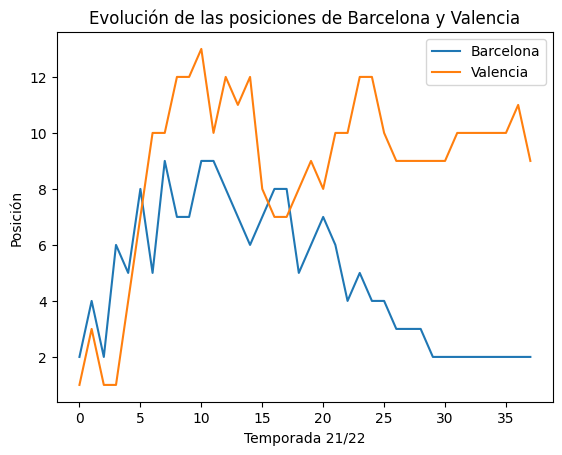

In [35]:
import matplotlib.pyplot as plt


plt.plot(posiciones_barcelona, label='Barcelona')
plt.plot(posiciones_valencia, label='Valencia')

plt.title('Evolución de las posiciones de Barcelona y Valencia')
plt.xlabel('Temporada 21/22')
plt.ylabel('Posición')
plt.legend()
plt.show()


## Pregunta 2
Construya un gráfico de barras que muestra en una misma barra para cada equipo: la cantidad total de goles convertidos, cantidad total de goles convertidos como local, y cantidad total de goles convertidos como visitante en todos los torneos para los que se tiene registro. Deben estar todos los equipos en el mismo gráfico.
¿Qué puede decir de los resultados para el Eibar y el Sporting de Gijón? ¿Cómo se lo explica? Argumente con datos.

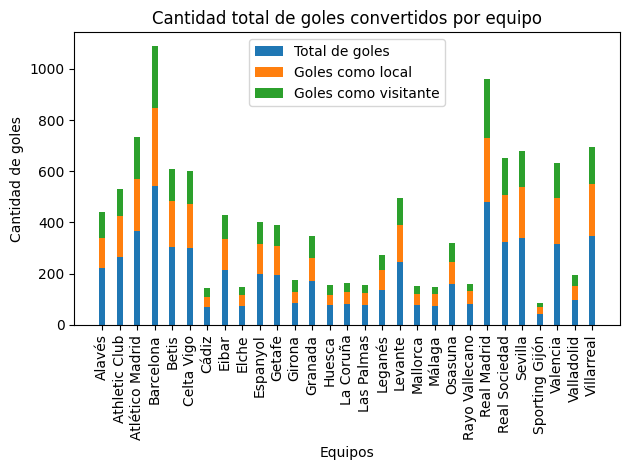

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

goles_local = partidos6t.groupby('Local')['Goles Local'].sum()
goles_visitante = partidos6t.groupby('Visitante')['Goles Visitante'].sum()
goles_totales = goles_local.add(goles_visitante, fill_value=0)

fig, ax = plt.subplots()
bar_width = 0.35
indices = range(len(goles_totales))

ax.bar(indices, goles_totales, bar_width, label='Total de goles')
ax.bar(indices, goles_local, bar_width, label='Goles como local', bottom=goles_totales)
ax.bar(indices, goles_visitante, bar_width, label='Goles como visitante', bottom=goles_totales + goles_local)

ax.set_xlabel('Equipos')
ax.set_ylabel('Cantidad de goles')
ax.set_title('Cantidad total de goles convertidos por equipo')
ax.set_xticks(indices)
ax.set_xticklabels(goles_totales.index, rotation='vertical')
ax.legend()

plt.tight_layout()
plt.show()


Sporting de Gijon, es el equipo que menos goles tiene, puede ser porque solo estuvo participando en algunas temporadas. Eiber tiene muchos mas goles que Sporting diría que esta en el promedio, estas afirmaciones requeiren un analisis mas profundo.

## Pregunta 3
Considere que ha diseñado un método simple para predecir el resultado del próximo partido de cualquier equipo. Este método observa la cantidad de puntos que tiene cada equipo (que disputarán el partido) antes del partido y pronostica como ganador al equipo que tiene más puntos. En caso de que tengan la misma cantidad de puntos pronostica Empate.

Bajo este método de pronóstico, realice un pronóstico desde las fechas 34 hasta la 38 y compare la diferencia entre la cantidad de puntos que realmente obtuvo cada equipo con la cantidad de puntos que este método pronosticó que tendría. Calcule la media del error promedio absoluto.

In [247]:
#ej2122 = partidos6t[(partidos6t['Temporada']=='17/22')&(partidos6t['Torneo']=='Primera división')]
equip2122 = ej2122['Local'].unique().tolist()

def tabla_posicion(data,fecha,equipos):
    tabla = {}
    for equipo in equipos:
        data_usar = data[(data['Wk']<=fecha)&((data['Local']==equipo)|(data['Visitante']==equipo))]
        puntos = 0
        for i in range(len(data_usar)):
            ganador = str(data_usar.iloc[i]['Ganador'])
            if ganador == equipo:
                puntos += 3
            if ganador == 'Empate':
                puntos +=1
        tabla[equipo] = puntos
    df = pd.DataFrame([[key, tabla[key]] for key in tabla.keys()], columns=['Equipo', 'Puntos'])
    df = df.sort_values(by='Puntos',ascending = False).reset_index()
    df['Fecha'] = fecha
    df['Temporada'] = temporada
    return df[['Fecha', 'Temporada','Equipo','Puntos']]

tabla_puntajes = []
temporadas = ['21/22']

for temporada in temporadas:
    ej_temporada = partidos6t[(partidos6t['Temporada'] == temporada) & (partidos6t['Torneo'] == 'Primera división')]
    for i in range(1, 39):  # Rango de valores para i, desde 1 hasta 39 (inclusive)   
        equip2122 = ej_temporada['Local'].unique().tolist()
        tabla = tabla_posicion(ej_temporada , i, equip2122)
        tabla_puntajes.append(tabla)



In [248]:
import pandas as pd

tabla_puntajes_frame = pd.concat(tabla_puntajes, ignore_index=True)


In [249]:
tabla_puntajes_frame

,Fecha,Temporada,Equipo,Puntos
0,1,21/22,Valencia,3
1,1,21/22,Barcelona,3
2,1,21/22,Atlético Madrid,3
3,1,21/22,Sevilla,3
4,1,21/22,Real Madrid,3
...,...,...,...,...
755,38,21/22,Mallorca,39
756,38,21/22,Getafe,39
757,38,21/22,Granada,38
758,38,21/22,Levante,35


In [145]:
tabla_puntajes_frame.to_csv('tabla_puntajes_frame.csv', index=False)


In [283]:
filtro_fechas = (tabla_puntajes_frame['Fecha'] >= 34) & (tabla_puntajes_frame['Fecha'] <= 38)
tabla_fechas = tabla_puntajes_frame[filtro_fechas]


In [251]:
fila_fecha_33 = tabla_puntajes_frame[tabla_puntajes_frame['Fecha'] == 33].copy()
fila_fecha_33

,Fecha,Temporada,Equipo,Puntos
640,33,21/22,Real Madrid,78
641,33,21/22,Barcelona,63
642,33,21/22,Sevilla,63
643,33,21/22,Atlético Madrid,61
644,33,21/22,Betis,57
645,33,21/22,Real Sociedad,55
646,33,21/22,Villarreal,52
647,33,21/22,Athletic Club,48
648,33,21/22,Osasuna,44
649,33,21/22,Valencia,42


In [252]:
partidos_temporada_2122 = partidos6t[partidos6t['Temporada'] == '21/22'].copy()
partidos_temporada_2122

,Wk,Date,Local,Score,Visitante,Attendance,Torneo,Goles Local,Goles Visitante,Total goles partido,Año,Mes,Temporada,Resultado,Ganador
0,1.0,2021-08-13,Valencia,1–0,Getafe,9868.0,Primera división,1,0,1,2021,8,21/22,Local,Valencia
1,1.0,2021-08-14,Cádiz,1–1,Levante,6941.0,Primera división,1,1,2,2021,8,21/22,Empate,Empate
2,1.0,2021-08-14,Mallorca,1–1,Betis,6279.0,Primera división,1,1,2,2021,8,21/22,Empate,Empate
3,1.0,2021-08-14,Osasuna,0–0,Espanyol,6715.0,Primera división,0,0,0,2021,8,21/22,Empate,Empate
4,1.0,2021-08-14,Alavés,1–4,Real Madrid,3968.0,Primera división,1,4,5,2021,8,21/22,Visitante,Real Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,38.0,2022-05-22,Alavés,0–1,Cádiz,11138.0,Primera división,0,1,1,2022,5,21/22,Visitante,Cádiz
420,38.0,2022-05-22,Granada,0–0,Espanyol,17951.0,Primera división,0,0,0,2022,5,21/22,Empate,Empate
421,38.0,2022-05-22,Real Sociedad,1–2,Atlético Madrid,23586.0,Primera división,1,2,3,2022,5,21/22,Visitante,Atlético Madrid
422,38.0,2022-05-22,Barcelona,0–2,Villarreal,54850.0,Primera división,0,2,2,2022,5,21/22,Visitante,Villarreal


In [253]:
partidos = partidos_temporada_2122[partidos_temporada_2122['Wk'].isin([34, 35, 36, 37, 38])]
partidos = partidos[[ 'Wk','Local', 'Visitante']]

In [254]:
# Crear una columna para almacenar los puntos pronosticados
partidos['Resultado_Pronosticado'] = ''
partidos['Puntos_Local'] = 0
partidos['Puntos_Visitante'] = 0

# Iterar sobre cada partido
for index, partido in partidos.iterrows():
    equipo_local = partido['Local']
    equipo_visitante = partido['Visitante']
     
    # Obtener los puntos de los equipos en la fecha 33
    puntos_local = fila_fecha_33.loc[fila_fecha_33['Equipo'] == equipo_local, 'Puntos'].values[0]
    puntos_visitante = fila_fecha_33.loc[fila_fecha_33['Equipo'] == equipo_visitante, 'Puntos'].values[0]
    
    # Asignar los puntos y el resultado pronosticado a las columnas correspondientes
    partidos.loc[index, 'Puntos_Local'] = puntos_local
    partidos.loc[index, 'Puntos_Visitante'] = puntos_visitante
    
    # Calcular el puntaje según el resultado pronosticado
    if puntos_local > puntos_visitante:
        partidos.loc[index, 'Resultado_Pronosticado'] = equipo_local
        partidos.loc[index, 'Puntos_Local'] += 3
        fila_fecha_33.loc[fila_fecha_33['Equipo'] == equipo_local, 'Puntos'] += 3
            
    elif puntos_local < puntos_visitante:
        partidos.loc[index, 'Resultado_Pronosticado'] = equipo_visitante
        partidos.loc[index, 'Puntos_Visitante'] += 3 
        fila_fecha_33.loc[fila_fecha_33['Equipo'] == equipo_visitante, 'Puntos'] += 3  
        
    else:
        partidos.loc[index, 'Resultado_Pronosticado'] = 'Empate'
        partidos.loc[index, 'Puntos_Local'] += 1
        partidos.loc[index, 'Puntos_Visitante'] += 1
        fila_fecha_33.loc[fila_fecha_33['Equipo'] == equipo_local, 'Puntos'] += 1
        fila_fecha_33.loc[fila_fecha_33['Equipo'] == equipo_visitante, 'Puntos'] += 1
        
        


In [255]:
partidos

,Wk,Local,Visitante,Resultado_Pronosticado,Puntos_Local,Puntos_Visitante
370,34.0,Sevilla,Cádiz,Sevilla,66,31
371,34.0,Alavés,Villarreal,Villarreal,25,55
372,34.0,Real Madrid,Espanyol,Real Madrid,81,39
373,34.0,Valencia,Levante,Valencia,45,25
374,34.0,Athletic Club,Atlético Madrid,Atlético Madrid,48,64
375,34.0,Elche,Osasuna,Osasuna,38,47
376,34.0,Granada,Celta Vigo,Celta Vigo,30,42
377,34.0,Rayo Vallecano,Real Sociedad,Real Sociedad,40,58
378,34.0,Barcelona,Mallorca,Barcelona,66,32
379,34.0,Getafe,Betis,Betis,35,60


In [263]:
resultados_algoritmo_34 = partidos.loc[partidos['Wk'] == 34, ['Wk','Local', 'Puntos_Local', 'Visitante', 'Puntos_Visitante']]
resultados_algoritmo_35 = partidos.loc[partidos['Wk'] == 35, ['Wk','Local', 'Puntos_Local', 'Visitante', 'Puntos_Visitante']]
resultados_algoritmo_36 = partidos.loc[partidos['Wk'] == 36, ['Wk','Local', 'Puntos_Local', 'Visitante', 'Puntos_Visitante']]
resultados_algoritmo_37 = partidos.loc[partidos['Wk'] == 37, ['Wk','Local', 'Puntos_Local', 'Visitante', 'Puntos_Visitante']]
resultados_algoritmo_38 = partidos.loc[partidos['Wk'] == 38, ['Wk','Local', 'Puntos_Local', 'Visitante', 'Puntos_Visitante']]

In [264]:
# Concatenar las columnas 'Wk', 'Local' y 'Puntos_Local' con las columnas 'Visitante' y 'Puntos_Visitante'
resultados_algoritmo_34 = pd.concat([resultados_algoritmo_34[['Wk', 'Local', 'Puntos_Local']],
                    resultados_algoritmo_34[['Wk', 'Visitante', 'Puntos_Visitante']].rename(columns={'Visitante': 'Local', 'Puntos_Visitante': 'Puntos_Local'})])
# Restablecer el índice del DataFrame
resultados_algoritmo_34 = resultados_algoritmo_34.reset_index(drop=True)
# Imprimir el resultado
print(resultados_algoritmo_34)


      Wk            Local  Puntos_Local
0   34.0          Sevilla            66
1   34.0           Alavés            25
2   34.0      Real Madrid            81
3   34.0         Valencia            45
4   34.0    Athletic Club            48
5   34.0            Elche            38
6   34.0          Granada            30
7   34.0   Rayo Vallecano            40
8   34.0        Barcelona            66
9   34.0           Getafe            35
10  34.0            Cádiz            31
11  34.0       Villarreal            55
12  34.0         Espanyol            39
13  34.0          Levante            25
14  34.0  Atlético Madrid            64
15  34.0          Osasuna            47
16  34.0       Celta Vigo            42
17  34.0    Real Sociedad            58
18  34.0         Mallorca            32
19  34.0            Betis            60


In [265]:
# Concatenar las columnas 'Wk', 'Local' y 'Puntos_Local' con las columnas 'Visitante' y 'Puntos_Visitante'
resultados_algoritmo_35 = pd.concat([resultados_algoritmo_35[['Wk', 'Local', 'Puntos_Local']],
                    resultados_algoritmo_35[['Wk', 'Visitante', 'Puntos_Visitante']].rename(columns={'Visitante': 'Local', 'Puntos_Visitante': 'Puntos_Local'})])
# Restablecer el índice del DataFrame
resultados_algoritmo_35 = resultados_algoritmo_35.reset_index(drop=True)

resultados_algoritmo_36 = pd.concat([resultados_algoritmo_36[['Wk', 'Local', 'Puntos_Local']],
                    resultados_algoritmo_36[['Wk', 'Visitante', 'Puntos_Visitante']].rename(columns={'Visitante': 'Local', 'Puntos_Visitante': 'Puntos_Local'})])
# Restablecer el índice del DataFrame
resultados_algoritmo_36 = resultados_algoritmo_36.reset_index(drop=True)

resultados_algoritmo_37 = pd.concat([resultados_algoritmo_37[['Wk', 'Local', 'Puntos_Local']],
                    resultados_algoritmo_37[['Wk', 'Visitante', 'Puntos_Visitante']].rename(columns={'Visitante': 'Local', 'Puntos_Visitante': 'Puntos_Local'})])
# Restablecer el índice del DataFrame
resultados_algoritmo_37 = resultados_algoritmo_37.reset_index(drop=True)

resultados_algoritmo_38 = pd.concat([resultados_algoritmo_38[['Wk', 'Local', 'Puntos_Local']],
                    resultados_algoritmo_38[['Wk', 'Visitante', 'Puntos_Visitante']].rename(columns={'Visitante': 'Local', 'Puntos_Visitante': 'Puntos_Local'})])
# Restablecer el índice del DataFrame
resultados_algoritmo_38 = resultados_algoritmo_38.reset_index(drop=True)


In [289]:
import pandas as pd

# Unir las tablas una debajo de la otra
resultados_predictivos = pd.concat([resultados_algoritmo_34, resultados_algoritmo_35,resultados_algoritmo_36, resultados_algoritmo_37, resultados_algoritmo_38], ignore_index=True)

# Imprimir el resultado
resultados_predictivos


,Wk,Local,Puntos_Local
0,34.0,Sevilla,66
1,34.0,Alavés,25
2,34.0,Real Madrid,81
3,34.0,Valencia,45
4,34.0,Athletic Club,48
...,...,...,...
95,38.0,Cádiz,34
96,38.0,Espanyol,45
97,38.0,Atlético Madrid,68
98,38.0,Villarreal,58


In [288]:
tabla_fechas = pd.DataFrame(tabla_fechas)  # Reemplaza tus_datos con la variable que contiene los datos
tabla_fechas

,Fecha,Temporada,Equipo,Puntos
660,34,21/22,Real Madrid,81
661,34,21/22,Barcelona,66
662,34,21/22,Sevilla,64
663,34,21/22,Atlético Madrid,61
664,34,21/22,Betis,58
...,...,...,...,...
755,38,21/22,Mallorca,39
756,38,21/22,Getafe,39
757,38,21/22,Granada,38
758,38,21/22,Levante,35


In [293]:
tabla_combinada = pd.merge(tabla_fechas, resultados_predictivos, left_on=['Fecha', 'Equipo'], right_on=['Wk', 'Local'], how='inner')
tabla_combinada

,Fecha,Temporada,Equipo,Puntos,Wk,Local,Puntos_Local
0,34,21/22,Real Madrid,81,34.0,Real Madrid,81
1,34,21/22,Barcelona,66,34.0,Barcelona,66
2,34,21/22,Sevilla,64,34.0,Sevilla,66
3,34,21/22,Atlético Madrid,61,34.0,Atlético Madrid,64
4,34,21/22,Betis,58,34.0,Betis,60
...,...,...,...,...,...,...,...
95,38,21/22,Mallorca,39,38.0,Mallorca,35
96,38,21/22,Getafe,39,38.0,Getafe,35
97,38,21/22,Granada,38,38.0,Granada,30
98,38,21/22,Levante,35,38.0,Levante,26


In [297]:
error_absoluto = abs(tabla_combinada['Puntos_Local'] - tabla_combinada['Puntos'])
media_error_absoluto = error_absoluto.mean()
media_error_absoluto

3.04

**En promedio, los pronósticos tienen un error absoluto de aproximadamente 3.04**

## Pregunta 4
Ahora queremos clasificar a los equipos entre los que hacen muchos goles y los que no. ¿Cómo haría esta clasificación?

1. Calcula el promedio de goles por equipo en la temporada o rango de tamporadas.
2. Establecemos un umbral  (valor de numero de  goles) para clasificar a los equipos como "equipo goleador" o "equipo no goleador".
3. Clasifica a los equipos en las categorías correspondientes utilizando el umbral.